In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #null value 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

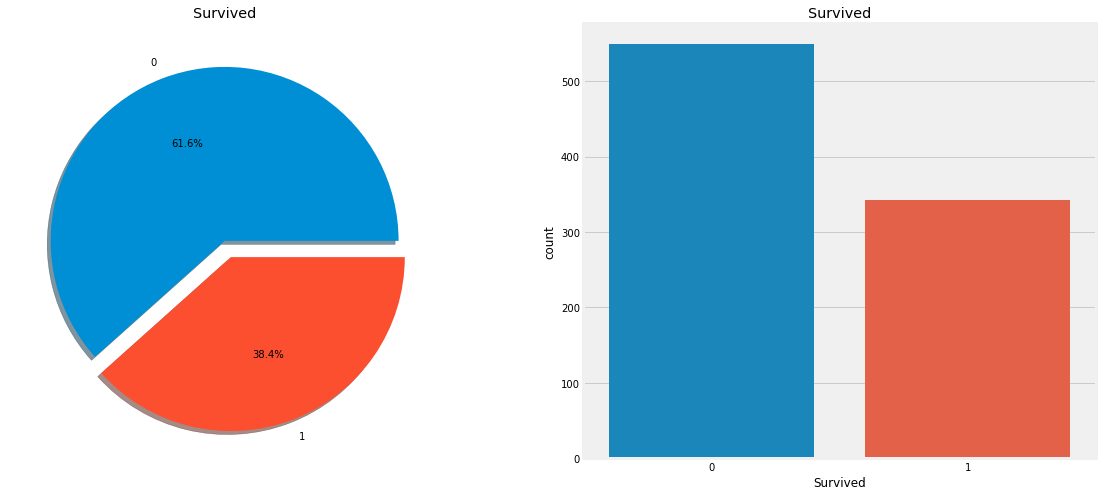

In [5]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

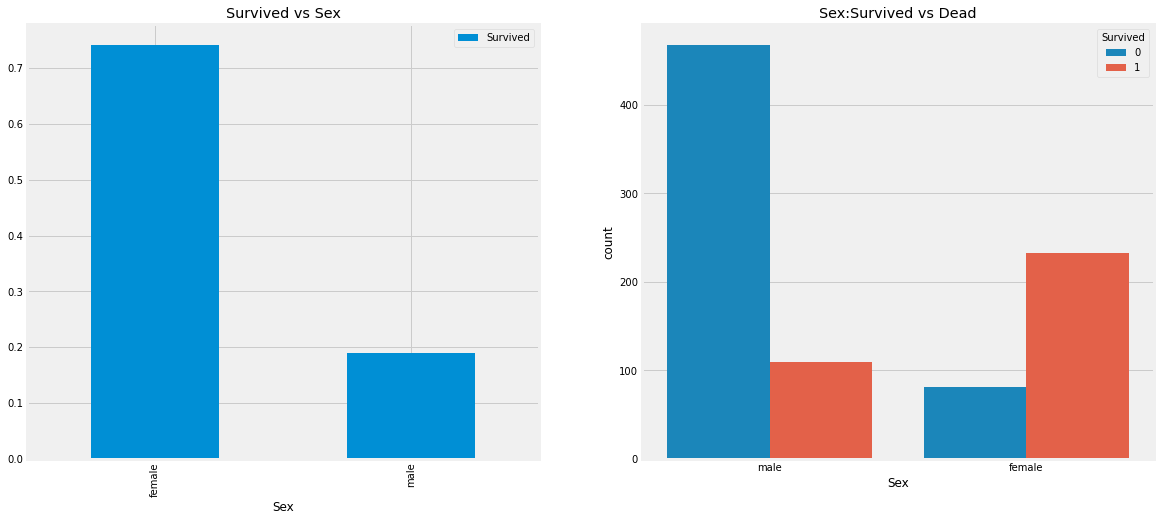

In [7]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


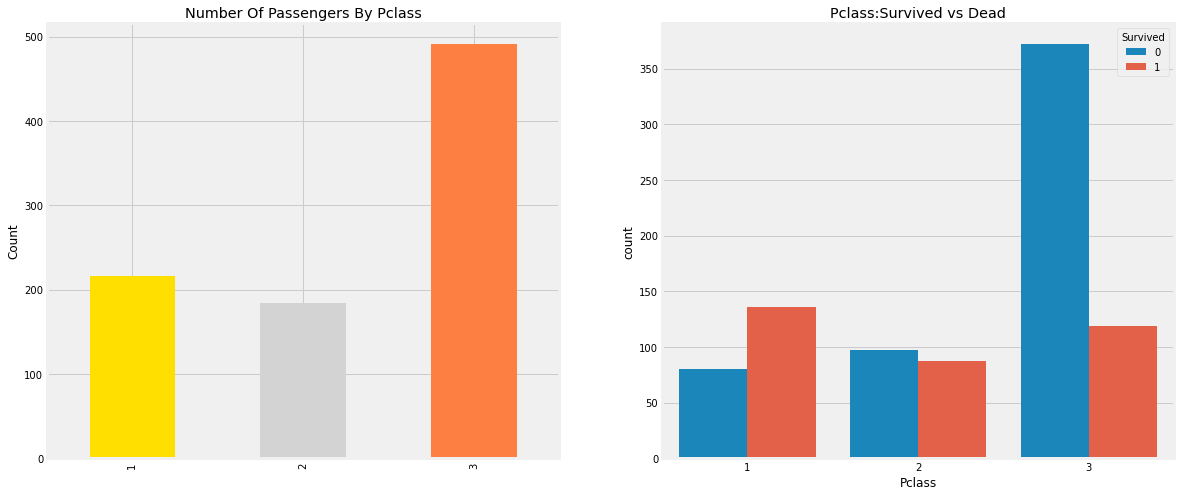

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#FD7F42', '#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Class가 높을 수록 생존률이 높음

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap = 'summer_r')

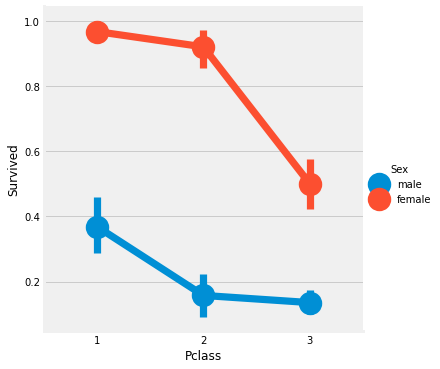

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = data)
plt.show()

Pclass별 생존률을 성별에 따라 나눠서 보여줌. 
* 여자가 생존률이 높음
* Class가 높을수록 생존률이 높음

In [12]:
print('Oldest Passenger was : ', data['Age'].max(),'Years')
print('Youngest Passenger was : ', data['Age'].min(),'Years')
print('Average Age of Passenger was : ', data['Age'].mean(),'Years')

Oldest Passenger was :  80.0 Years
Youngest Passenger was :  0.42 Years
Average Age of Passenger was :  29.69911764705882 Years


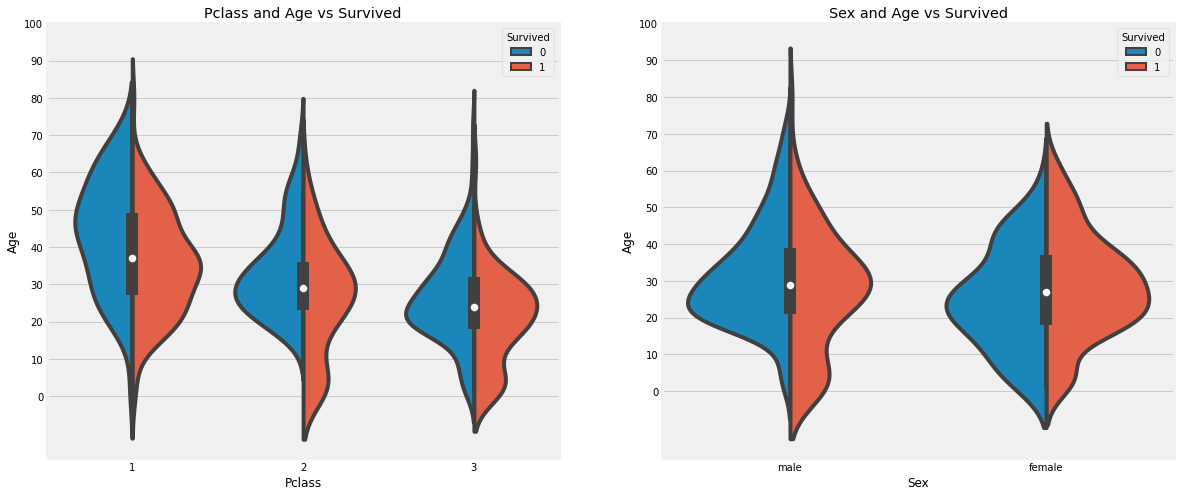

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data= data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

성별에 따른 생존률의 차이가 보이니까 이름 앞에 붙는 (Ms. Mr. Mrs 등)과 같은 수식어를 이용해 성별을 분류

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+\.)')

이니셜이라는 새로운 분류기준을 만듦

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt.,Col.,Countess.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean() #Check average age by Initials

Initial
Capt.        70.000000
Col.         58.000000
Countess.    33.000000
Don.         40.000000
Dr.          42.000000
Jonkheer.    38.000000
Lady.        48.000000
Major.       48.500000
Master.       4.574167
Miss.        21.773973
Mlle.        24.000000
Mme.         24.000000
Mr.          32.368090
Mrs.         35.898148
Ms.          28.000000
Rev.         43.166667
Sir.         49.000000
Name: Age, dtype: float64

In [18]:
#나이의 NaN값을 평균 나이로 채움
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any() #null값이 없어짐을 확인

True

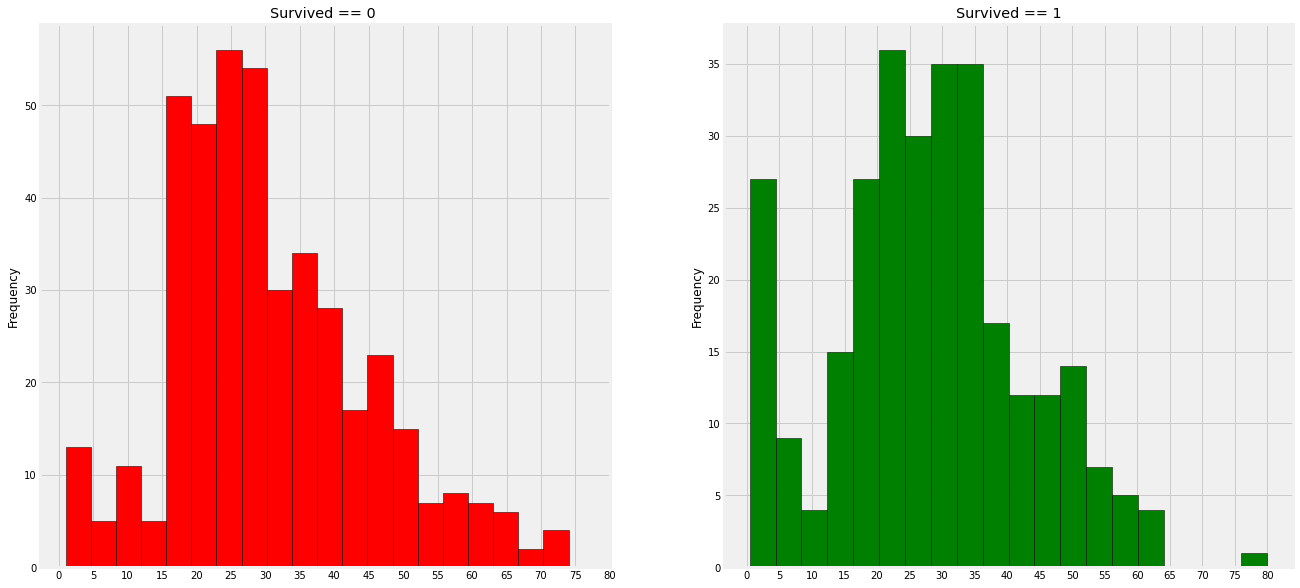

In [20]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data[data['Survived']==0].Age.plot.hist(ax = ax[0], bins=20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived == 0 ')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, color='green', edgecolor = 'black') #bins는 y축의 간격을 의미
x2 = list(range(0, 85 , 5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived == 1')
plt.show()

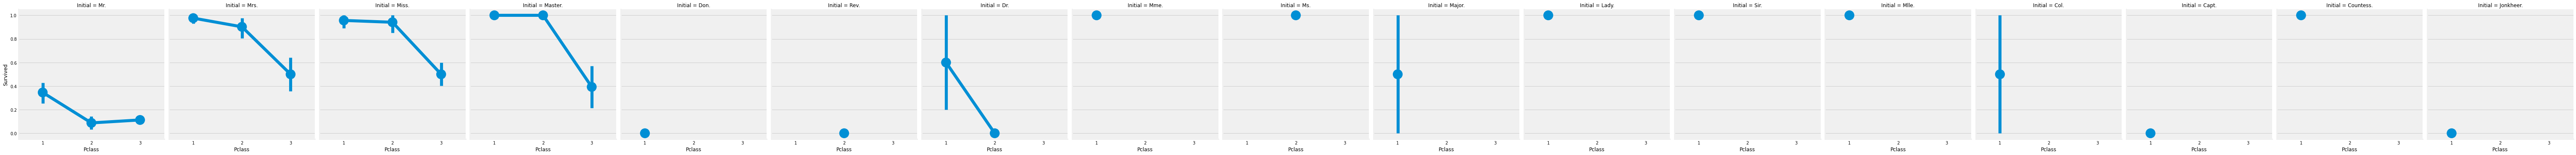

In [21]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

In [22]:
pd.crosstab([data.Embarked,data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

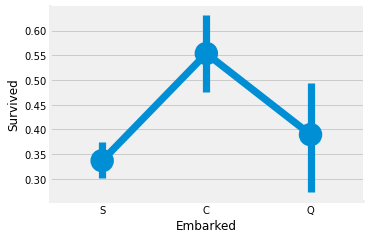

In [23]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3) #(가로, 세로)
plt.show()

C에서 탑승한 사람들의 생존률이 제일 높음

Text(0.5, 1.0, 'Embarked vs Pclass')

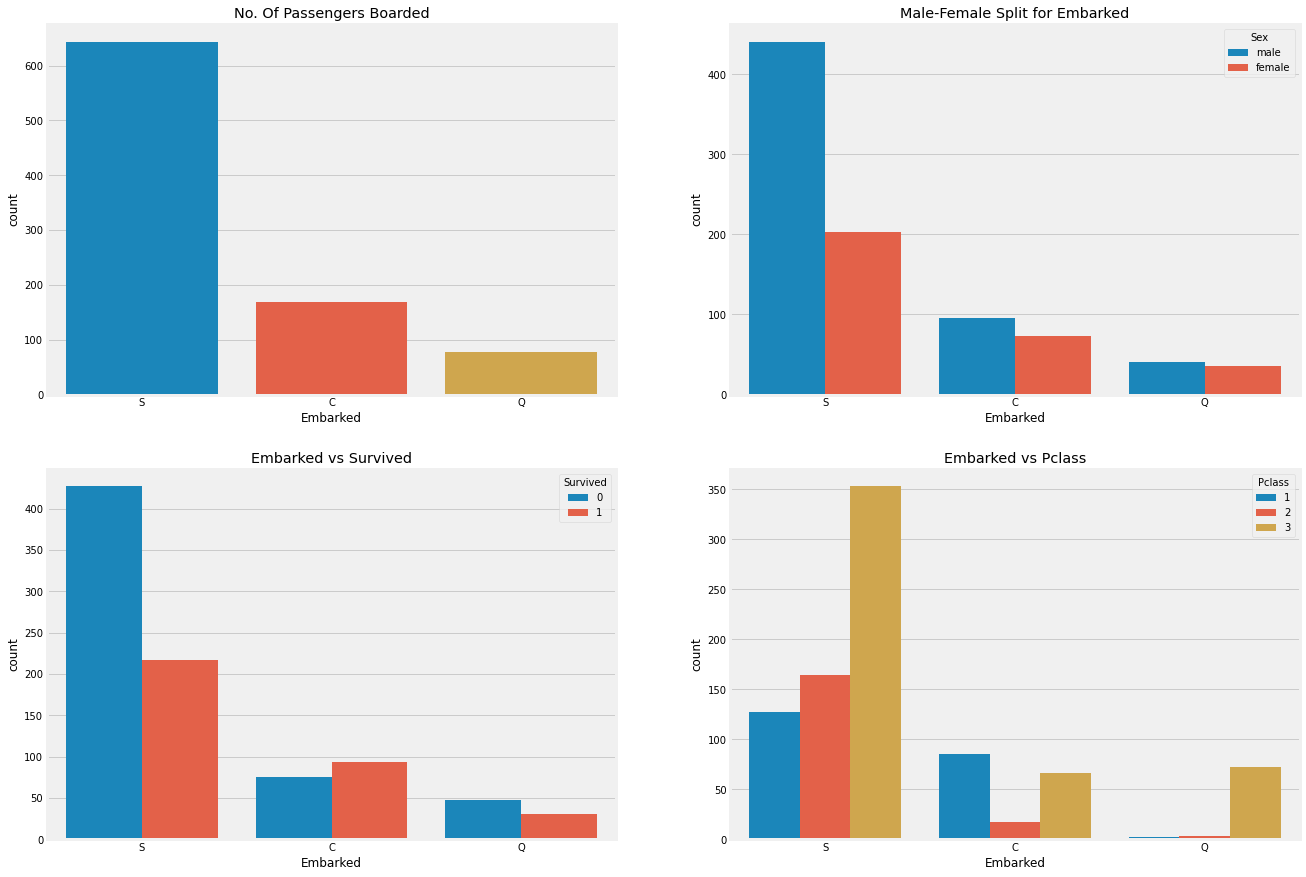

In [24]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data = data, ax = ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

* 많은 사람들이 S 클래스에서 탔고 대부분 pclass가 3이다. 그리고 남자가 많다
* C항구에서는 부자인 사람 (pclass가 1인 사람)이 많다

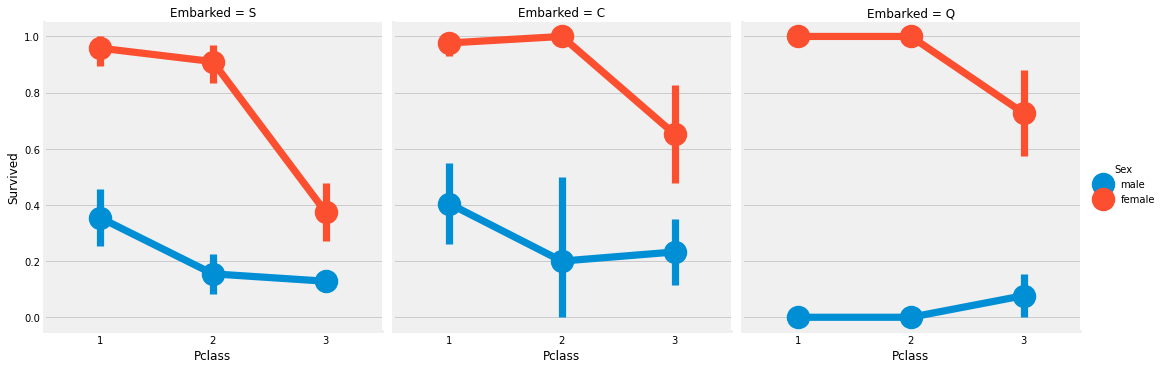

In [25]:
sns.factorplot('Pclass', 'Survived', hue= 'Sex', col = 'Embarked', data = data)
plt.show()

* 어떤 항구에서 탔건간에 pclass가 높을수록 생존률이 높다.
* Q에서 탑승한 남자의 생존률이 현저히 적다.
* S에서 탑승한 pclass 3의 사람들의 생존률이 매우 낮다

In [26]:
data['Embarked'].fillna('S', inplace = True) #대부분의 탑승자들이 S 항구에서 탔기 때문에 NaN값을 S로 대체

In [27]:
data.Embarked.isnull().any() #NaN값이 있는지 확인

False

가족관계에 따른 생존률
* Sibling = 형제관계
* Spouse = 배우자관계

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


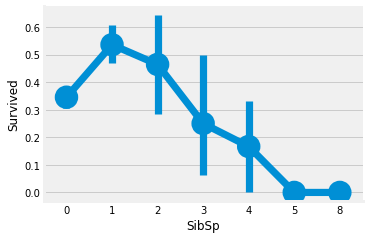

In [29]:
sns.factorplot('SibSp','Survived',data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


위 factorplot의 결과를 보면 1명인 사람 즉, sibsp의 값이 0인 사람의 생존률이 현격히 높다. 그리고 5, 8인 사람들은 생존률이 0이다.
그 이유는 바로 pclass가 3인 곳에 sibsp값이 5, 8인 사람들이 몰려있기 때문이다.

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


여기서도 가족이 큰 사람들(5,6)은 Pclass 3에 모두 몰려있음을 볼 수 있다.

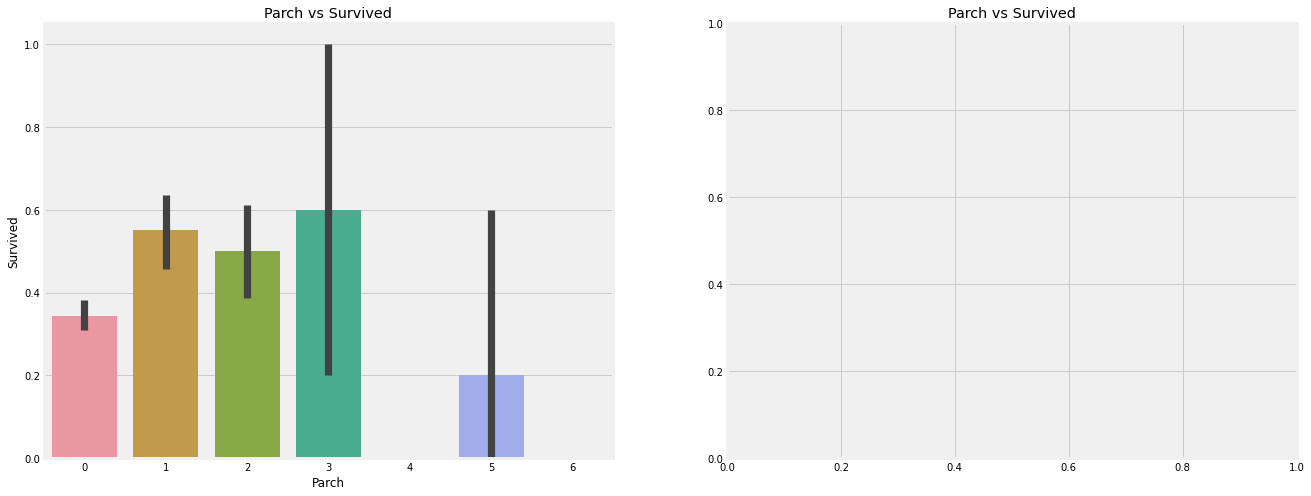

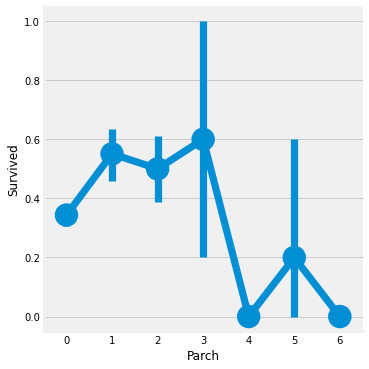

In [32]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('Parch', 'Survived', data = data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(3) #좀 이상함..
plt.show()

* Parent가 어느 정도 있는 사람들의 생존률이 아예 없는 사람보다 높다
* Parent 의 수가 4, 6인 사람들 즉, pclass 3에 있던 사람들의 생존률은 0이다.

In [33]:
print('Highest Fare was : ', data['Fare'].max())
print('Lowest Fare was : ', data['Fare'].min())
print('Average Fare was : ', data['Fare'].mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.2042079685746


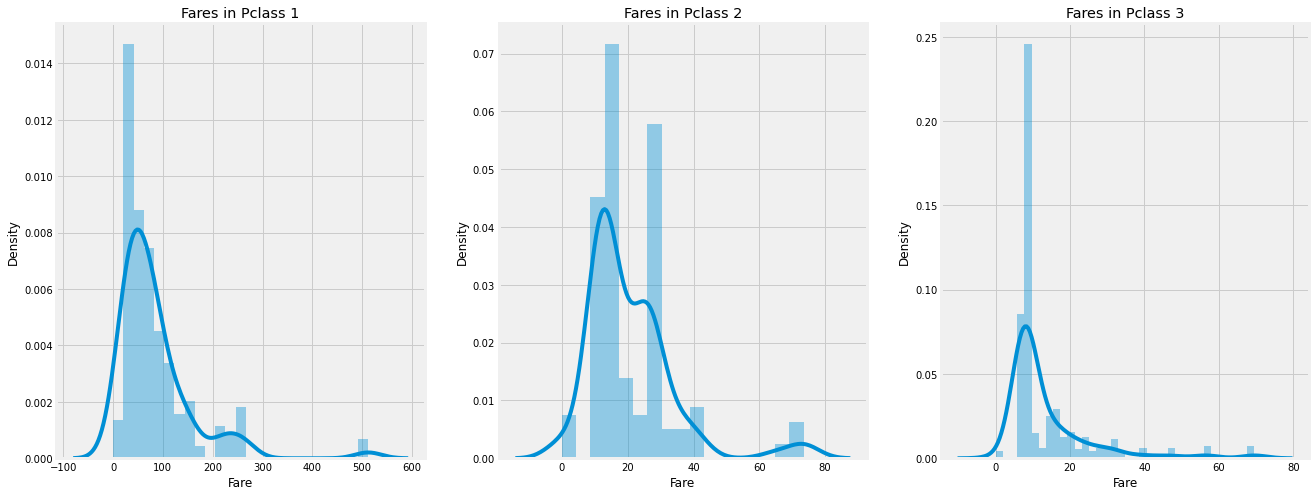

In [34]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

연속적인 값을 이산적인 값으로 변화를 줘서 분산을 줄여보자

# Feature들 간의 관계

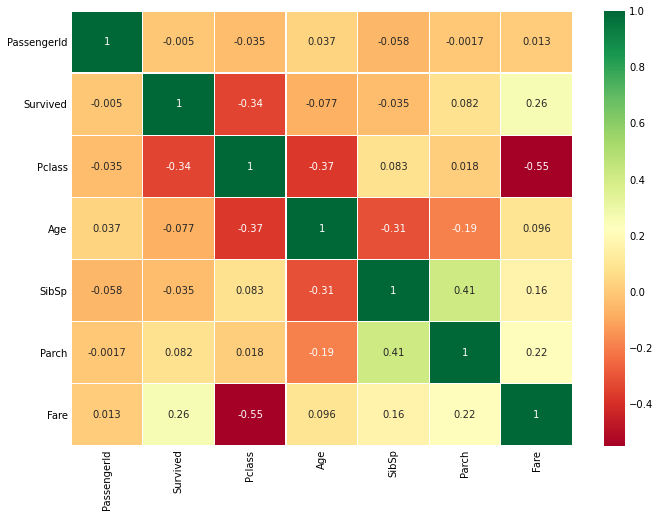

In [35]:
sns.heatmap(data.corr(), annot=True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

HeatMap 해석하는 법
* 양수 값 : 서로 관계성이 높은 feature
* 음수 값 : 서로 관계성이 낮은 feature
* 위 heatmap을 봤을 때는 SibSp, Parch와의 correlation이 0.41로 가장 높고 나머지는 거의 관계성이 적다고 볼 수 있다.
* 그래서 우리는 거의 모든 feature들을 이용할 수 있다.

# Feature Engineering and Data Cleaning

## Age_band

Age_band의 문제점

* Age는 연속적인 feature이고 이러한 연속적인 값은 machine learning model에 문제를 일으킬 수도 있ㄷ.ㅏ
* 예를들어 성별은 남자, 여자로 딱 분류할 수 있는데 나이의 경우 연속적인 값이기 때문에 분류체계를 명확히 하기 어렵다.
* 그래서 우리는 이러한 연속적인 값을 categorical value로 변경해줘야 한다.
* 제일 나이가 많은 사람은 80이니까 5bin으로 나눠주면 bin의 size는 80/5 = 16으로 설정해줘서 카테고리처럼 나이를 분류할 수 있다.

In [36]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,346
0,277
2,188
3,69
4,11


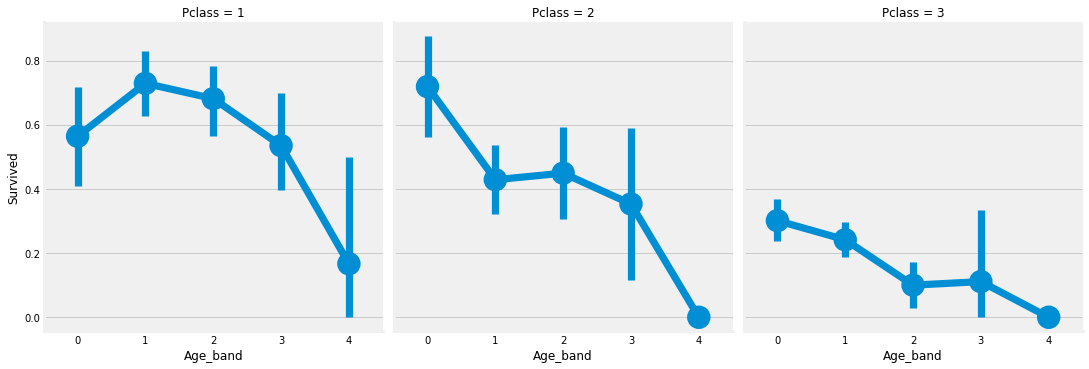

In [38]:
sns.factorplot('Age_band', 'Survived', data= data, col = 'Pclass')
plt.show()

Pclass 전반적으로 나이가 많을수록 생존률의 감소추세가 보인다

## Family_Size and Alone

Parch와 Sibsp Feature를 합쳐서 family size를 구해본다. Alone은 승객이 혼자인지 아닌지를 나타내는 요소.

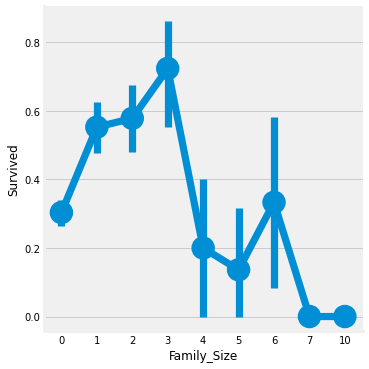

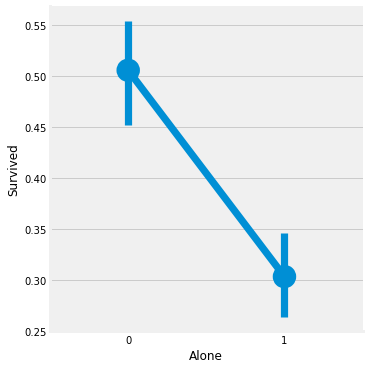

In [39]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(0)
plt.close(1)
plt.show()

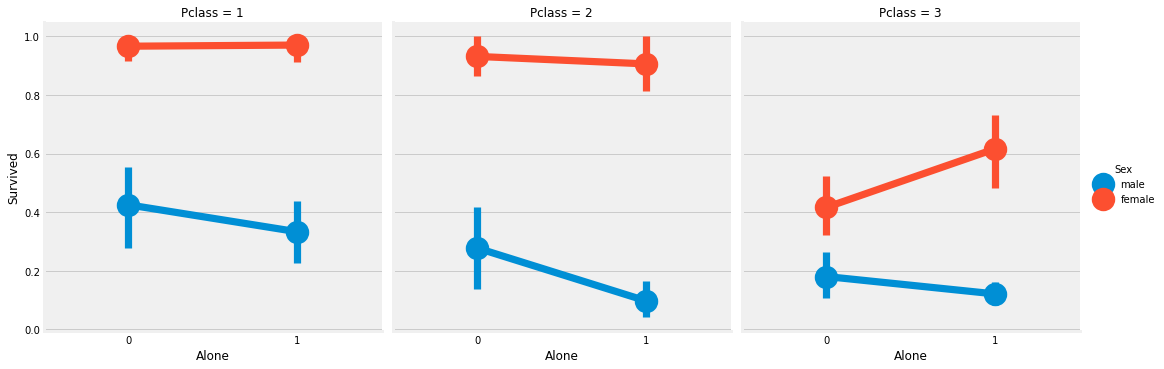

In [40]:
sns.factorplot('Alone','Survived', data=data, hue='Sex', col = 'Pclass')
plt.show()

성별과 Pclass에 관계없이 혼자 있는 경우의 생존률이 낮아진다(여자가 혼자 있는 경우가 더 많은 Pclass 3을 제외하고)

## Fare_Range

fare feature도 연속적인 값이므로 우리는 이를 카테고리화 시켜줘야할 필요가 있다. 이것도 나이처럼 4 bins로 나누어서 해보자. qcut을 이용할 예정.

In [41]:
data['Fare_Range']=pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [42]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat']=3

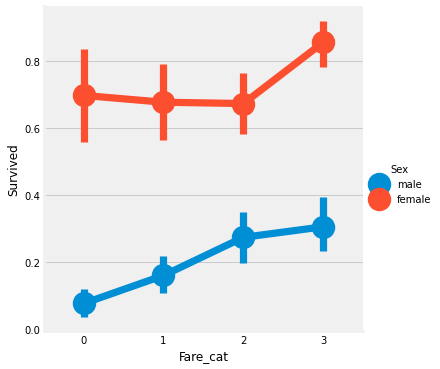

In [43]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue = 'Sex')
plt.show()

Fare_cat이 증가할 수록 생존률도 증가한다.

## 문자값들을 Numeric형태로 바꾸기

machine learning model에 string value를 넘길수는 없으니까 이를 Numeric한 값으로 바꿔주는 과정이 필요하다

In [44]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr.','Mrs.','Miss.','Master.','Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Mlle.', 'Mme.', 'Rev.', 'Sir.','Ms.','Other'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],inplace=True)

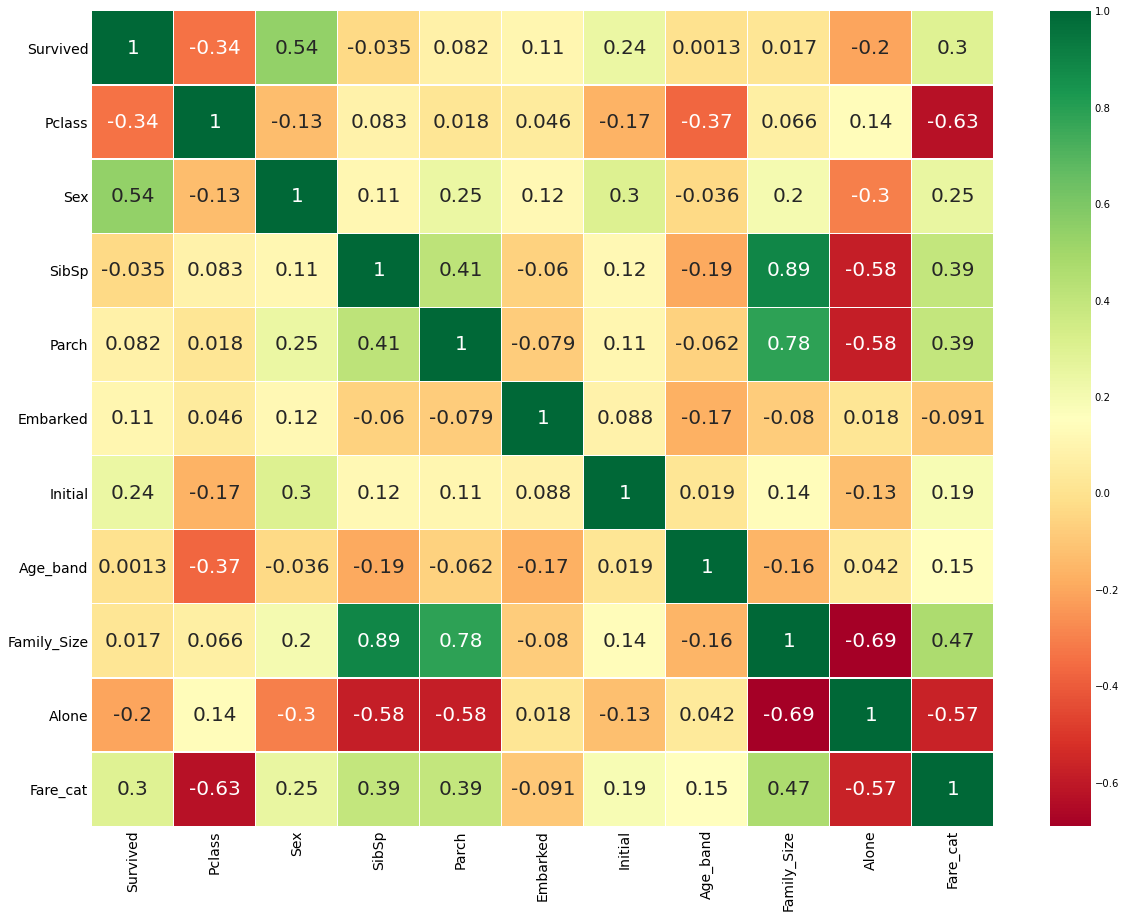

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Alone과 Parch, SibSp는 negative한 값(연관성 낮음)을 보이고 있고 Parch와 SibSp는 positive한 값(연관성 높음)을 보이고 있다.

## Predictive Modeling

EDA를 통해 feature에 대한 insight를 얻었으니 이제 model을 이용해 예측을 해볼 예정

1. Logistic Regression
2. Suppor Vector Machines(Linear and radial)
3. Random Forest
4. K-Nearest Neightbours
5. Naive Bayes
6. Decision Tree
7. Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [47]:
train, test = train_test_split(data, test_size=0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [48]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.8246268656716418


### Linear Support Vector Machine(linear-SVM)

In [49]:
model=svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.7910447761194029


### Logistic Regression

In [50]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.7947761194029851


### Decision Tree

In [54]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8246268656716418


K-Nearest Neighbours(KNN)

In [55]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8134328358208955


KNN의 n_neighbours attribute은 기본적으로 5로 설정이 되어있는데 이 n_neighbours의 값을 바꿔보면서 정확도를 확인해보자 

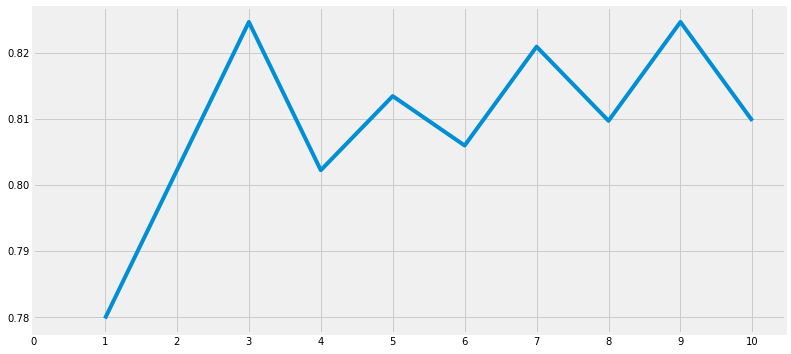

Accuracies for different values of n are: [0.77985075 0.80223881 0.82462687 0.80223881 0.81343284 0.80597015
 0.82089552 0.80970149 0.82462687 0.80970149] with the max value as  0.8246268656716418


In [59]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

n_neighbors의 값이 3일 때 제일 높은 accuracy가 나왔다

### Gaussian Naive Bayes

In [62]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.7835820895522388


### Random Forests

In [63]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8097014925373134


모델의 정확도가 높게 나왔다고 해서 classifier의 robustness가 좋다고 말할 수 없다.

만약 특정 모델의 정확도가 90%가 나왔다고 치자. 그렇다면 다음에도 그 모델로 90%의 정확도를 이끌어낼 수 있을까? 답은 모른다 이다.

이러한 상황을 'model variance'라고 한다.

이러한 문제를 극복하고 모델을 일반화하기 위해 우리는 Cross Validation을 이용한다.

## Cross Validation

우리는 모든 instance of dataset에 대해 알고리즘을 train하고 test해야 한다. 그러면 전반적인 데이터셋에 대한 평균적인 accuracy값을 얻을 수 있다.

* K-Fold Cross Validation은 데이터셋을 k개의 subset으로 나눔으로써 작동한다.

* k=5라고 가정하자. 그러면 1개의 파트를 testing에 사용하고 나머지 4개의 파트를 training에 사용하게 된다.

* testing에 사용하는 데이터셋의 subset을 계속 바꿔가면서 위 과정을 반복하고 그러면 우리는 평균적인 accuracy값을 얻어낼 수 있다.

* 어떤 데이터셋에 대해서는 underfit이 될 수 있고 또 어떤 데이터셋에 대해서는 overfit이 발생할 수 있으니 우리는 cross-validation을 통해 generalized된 model을 얻어낼 수 있다.

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22)

xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    #cv_result=cv_result #이 과정이 왜 필요한지 모르겠음
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.788976,0.040248
Radial Svm,0.818190,0.038814
Logistic Regression,0.787890,0.024733
KNN,0.780000,0.040368
Decision Tree,0.822709,0.024174
Naive Bayes,0.764345,0.028967
Random Forest,0.810387,0.027628


<AxesSubplot:>

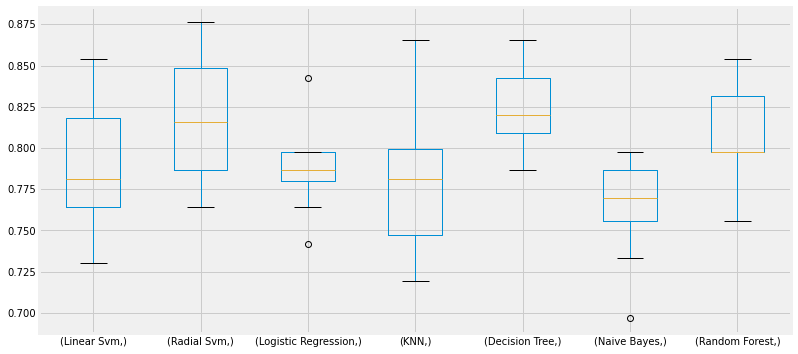

In [66]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

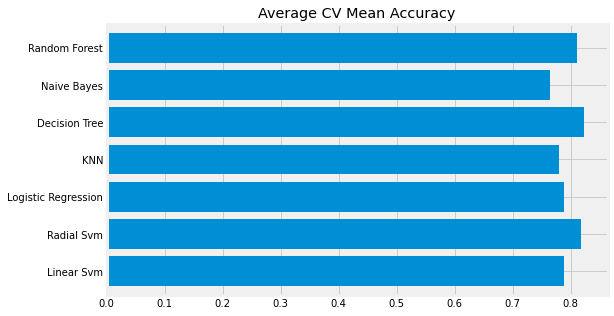

In [67]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

## Confusion Matrix

각 모델별로 어떤 예측결과를 맞게 했고 어떤걸 틀리게 예측했고를 파악할 수 있다.

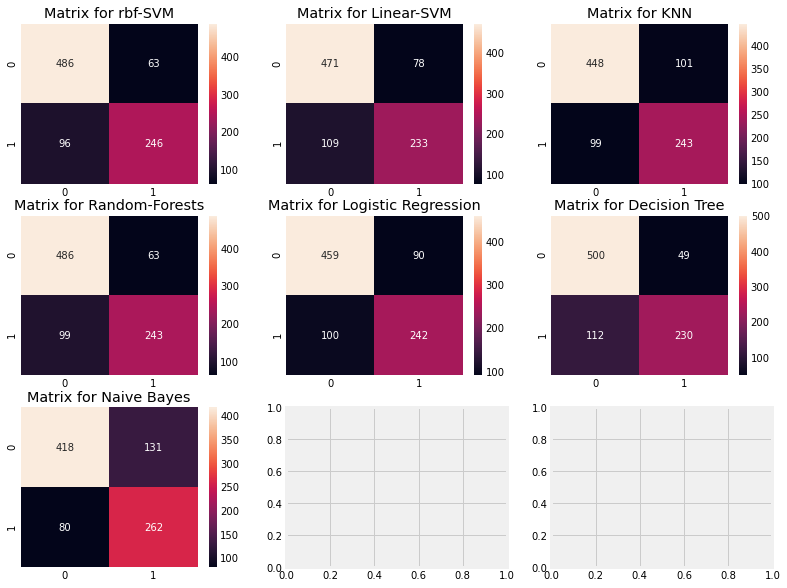

In [69]:
f, ax = plt.subplots(3, 3, figsize = (12, 10))
y_pred = cross_val_predict(svm.SVC(kernel ='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax = ax[0,0], annot=True, fmt = '2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=3), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

### Confusion Matrix 해석하는 법

왼쪽 대각선은 맞게 예측한 데이터들을 보여주고, 오른쪽 대각선은 틀리게 예측한 데이터들을 보여줌.

첫번째 confusion matrix인 rbf-SVM 모델의 confusion_matrix를 해석해보자.

* Y축이 실제값, X축이 예측한 값이라고 해석하면 된다.
* 죽은 사람 486명을 죽었다고 예측 / 산 사람 246명을 살았다고 예측
* 죽은 사람 63명을 살았다고 예측 / 산 사람 96명을 죽었다고 예측

### Hyper-Parameters Tuning

SVM Model 의 C와 gamma와 같이 서로 다른 모델에 대한 서로 다른 파라미터들을 부여할 수 있는데 이러한 것을 hyper-parameters라고 한다. 이를 바꿈으로서 algorithm의 learning rate를 바꿀 수 있고 더 나은 모델을 얻을 수 있다.

SvM과 RandomForests의 hyperparameter를 튜닝해보자

### SVM

GridSearchCV를 이용해 최적의 파라미터값을 찾는다.

In [71]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8271294959512898
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   24.9s finished


### RandomForests

In [72]:
n_estimators = range(100, 1000, 100)
hyper={'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   38.5s finished


0.8170673529596385
RandomForestClassifier(n_estimators=400, random_state=0)


저의 경우 DecisionTreeClassifier가 기존 accuracy가 가장 높았기 때문에 DecisionTreeClassifier의 Hyperparameter tuning을 해보겠습니다.

In [78]:
from sklearn.tree import export_graphviz

tree_para={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
gd = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

0.8293829640323895
DecisionTreeClassifier(criterion='entropy', max_depth=4)


criterion은 'entropy'이고 max_depth는 4일때 가장 좋은 accuracy 82.9%가 나왔습니다.

## Ensembling

Ensembling은 다양한 model들의 combination으로 하나의 powerful한 model을 만들어내는 기법이다.

Ensembling을 통해 model의 stability를 높일 수 있으며 다음 과정을 통해 Ensembling을 진행할 수 있다.

1. Voting Classifier
2. Bagging
3. Boosting

### Voting Classifier

모든 submodel들의 예측결과에 대한 평균적인 예측 결과를 얻어오는 방식.

In [79]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)), 
                                                ('RBF',svm.SVC(probability=True, kernel ='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR',LogisticRegression(C=0.05)),
                                                ('DT',DecisionTreeClassifier(random_state=0)),
                                                ('NB',GaussianNB()),
                                                ('svm',svm.SVC(kernel='linear',probability=True))
                                               ],
                                   voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y, cv=10, scoring='accuracy')
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is 0.8237827715355804


### Bagging
Bagging은 데이터셋의 작은 부분에 비슷한 classifier들을 적용하고 모든 예측 결과에 대한 평균적인 값을 가져오는 방법이다. 평균값을 사용함으로써 분산을 줄일 수 있다. Voting Classifier와의 다른 점은 Bagging은 비슷한 classifier를 이용한다는 뜻이다

#### Bagged KNN
Bagging은 분산이 높은 모델에 대해 잘 작동한다. 이에 대한 예시르 Decision Tree와 Random Forests가 있다. 우리는 작은 n_neighbours값에 대해 KNN을 사용할 수 있다.

In [80]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators = 700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is : ',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is : ',result.mean())

The accuracy for bagged KNN is :  0.835820895522388
The cross validated score for bagged KNN is :  0.8193757802746566


#### Bagged DecisionTree

In [81]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0, n_estimators = 100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is :', metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is :', result.mean())

The accuracy for bagged Decision Tree is : 0.8097014925373134
The cross validated score for bagged Decision Tree is : 0.8171285892634206


### Boosting

Boosting은 classifier의 sequential learning을 이용하는 앙상블 기법이다.

* 모델이 먼저 complete한 데이터셋으로 학습이 된다.
* 모델은 어떤건 맞고 어떤건 틀린 instance를 갖게 된다.
* Iteration에 대해 틀린 예측값에 더 집증하거나 weight를 더 줄 것이다.
* 잘못 예측한 값을 올바르게 예측하게 된다.
* accuracy의 한계값에 도달할 때까지 model에 새로운 classifier가 추가된다.

#### AdaBoost(Adaptive Boosting)
Decision Tree의 weak learner 또는 estimator를 바꿔줘본다.

In [82]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X,Y,cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is: ',result.mean())

The cross validated score for AdaBoost is:  0.8249188514357053


#### Stochastic Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad,X,Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is : ',result.mean())

The cross validated score for Gradient Boosting is :  0.8149063670411986


#### XGBoost

In [84]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate=0.1)
result = cross_val_score(xgboost, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is : ',result.mean())

[07:02:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:02:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:02:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:03:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

AdaBoost에서 가장 높은 accuracry를 얻을 수 있었기 때문에 Hyper-Parameter Tuning을 통해 이를 높여보고자 한다.

In [85]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators':n_estimators,'learning_rate':learn_rate}
gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:  8.9min finished


0.8226602222082731
AdaBoostClassifier(learning_rate=0.05, n_estimators=400)


왜인지는 모르겠지만 hyper-parameter tuning을 하니 오히려 accuracy가 조금 떨어졌다. learning_rate가 0.05이고 n_estimators가 400일 때 가장 높은 accuracy 82.2%가 나왔다.

### Confusion Matrix for the Best Model

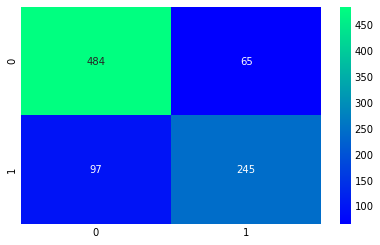

In [86]:
ada = AdaBoostClassifier(n_estimators = 200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap = 'winter', annot=True, fmt = '2.0f')
plt.show()

### Feature Importance

[07:24:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


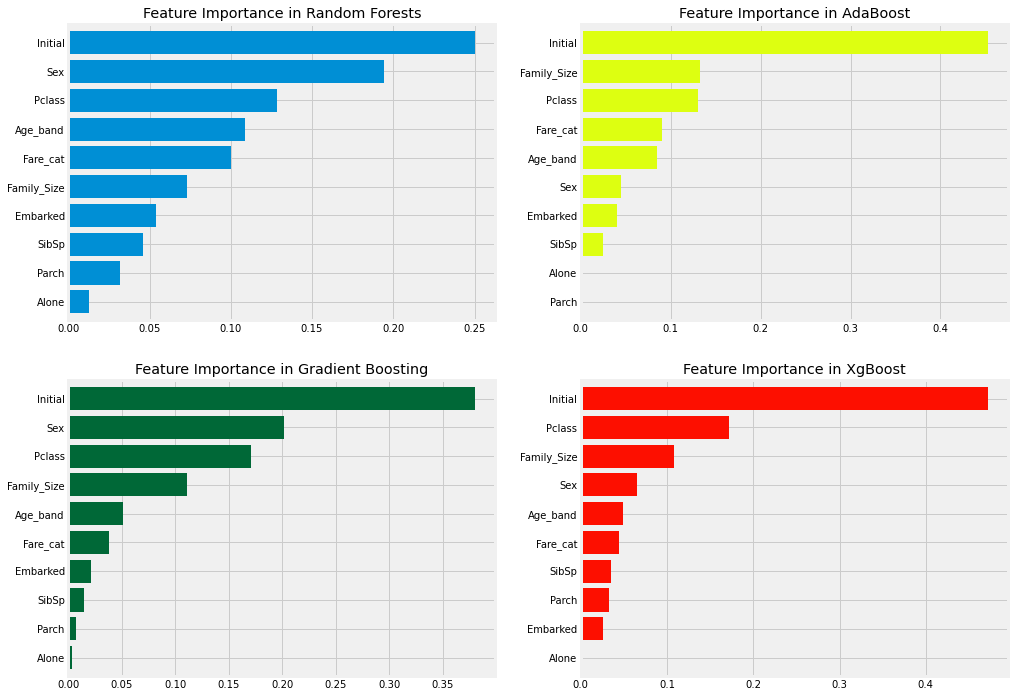

In [87]:
f, ax = plt.subplots(2, 2, figsize = (15, 12))
model = RandomForestClassifier(n_estimators = 500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax = ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators = 400, learning_rate = 0.05, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax = ax[0,1], color = '#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators = 500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width = 0.8, ax=ax[1,0], cmap = 'RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators = 900, learning_rate=0.1)
model.fit(X,Y)

pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1],color = '#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

* Initial, Pclass, Family_size 와 같이 공통으로 중요한 feature들이 보인다.
* Sex는 RandomForest와 GradientBoosting을 제외하고는 그렇게 크게 중요해 보이지는 않는다.
* 어찌됐든 Sex와 연관성이 깊은 Initial이 중요한 Feature로 많이 뽑혔기 때문에 성별이 중요한 요소인건 맞다.